# Load the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
import imghdr

# Load the Dataset

In [2]:
train_dir = 'datasets/New_Vegetable_Dataset/Training/'
validation_dir = 'datasets/New_Vegetable_Dataset/Validation/'
BATCH_SIZE = 32
IMG_SIZE = (224,224)

class_dir = os.listdir(train_dir)
class_lengths = {}

for class_dir in class_dir:
    # Construct the full path to the class directory
    full_path = os.path.join(train_dir, class_dir)
    if os.path.isdir(full_path):
        # Count the number of files in the class directory
        class_length = len(os.listdir(full_path))
        # Store the class name and its length in the dictionary
        class_lengths[class_dir.lower()] = class_length

# Print the result
for class_name, length in class_lengths.items():
    print(f"{class_name} = {length} of the class")

brokoli = 1200 of the class
kedelai edamame = 1200 of the class
kembang kol = 1200 of the class
kentang = 1200 of the class
kubis = 1200 of the class
labu air = 1200 of the class
lobak = 1200 of the class
mentimun = 1200 of the class
pakcoy = 1200 of the class
paprika = 1200 of the class
pare = 1200 of the class
terong = 1200 of the class
tomat = 1200 of the class
waluh hijau = 1200 of the class
wortel = 1200 of the class


In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 18000 files belonging to 15 classes.
Found 4500 files belonging to 15 classes.


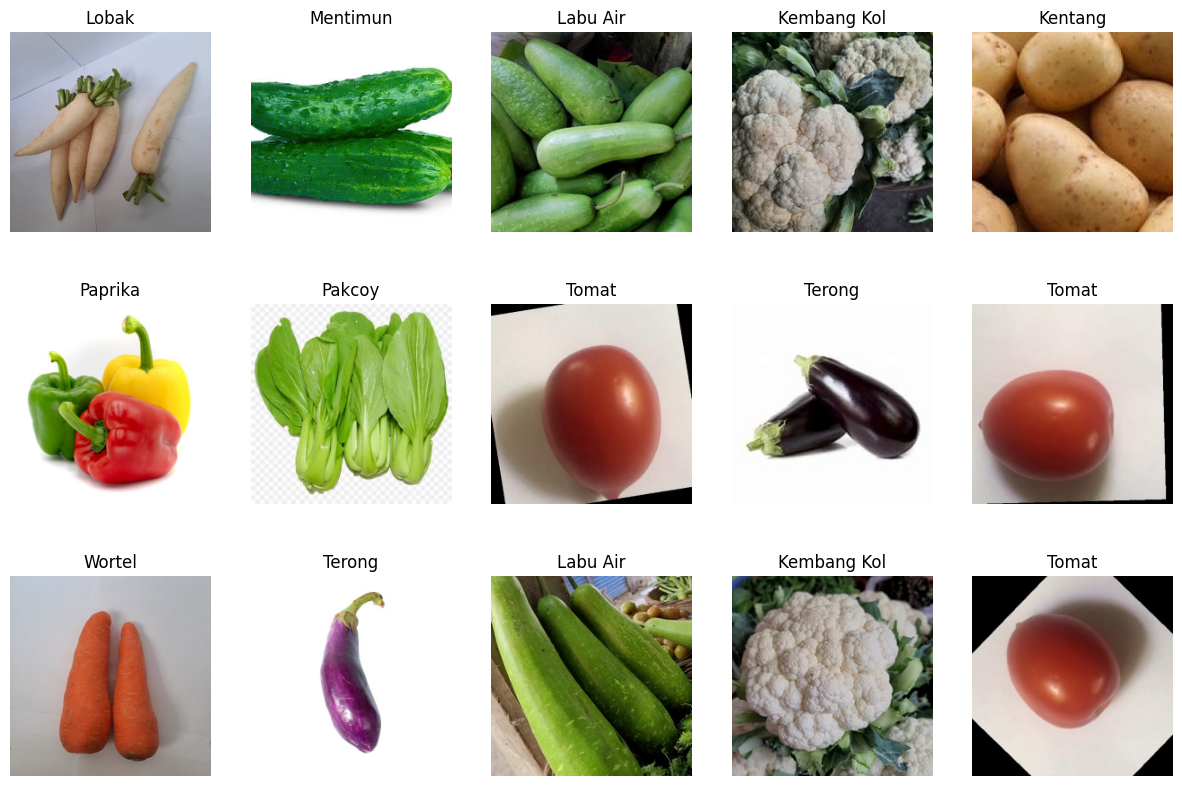

In [11]:
# Get class names
class_names = train_dataset.class_names

# Visualize a batch of images with their labels
plt.figure(figsize=(15, 10))
for images, labels in train_dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Preprocessing Image

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

def one_hot_encode(image, label):
    num_classes = 15
    label = tf.one_hot(label, num_classes)
    return image, label

train_dataset = train_dataset.map(one_hot_encode, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.map(one_hot_encode, num_parallel_calls=AUTOTUNE)

In [20]:
rescale = tf.keras.layers.Rescaling(1. / 255)

In [6]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomHeight(0.2)
])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example setup (replace with your actual setup)
datagen = ImageDataGenerator()
train_datagen = datagen.flow_from_directory(train_dir)

class_name = list()
for k, v in train_datagen.class_indices.items():
    print(str(v)+'.', k)
    class_name.append(k)


Found 18000 images belonging to 15 classes.
0. Brokoli
1. Kedelai Edamame
2. Kembang Kol
3. Kentang
4. Kubis
5. Labu Air
6. Lobak
7. Mentimun
8. Pakcoy
9. Paprika
10. Pare
11. Terong
12. Tomat
13. Waluh Hijau
14. Wortel


In [13]:
length_categories = len(class_name)
print('Length Of Class =', length_categories)
class_name

Length Of Class = 15


['Brokoli',
 'Kedelai Edamame',
 'Kembang Kol',
 'Kentang',
 'Kubis',
 'Labu Air',
 'Lobak',
 'Mentimun',
 'Pakcoy',
 'Paprika',
 'Pare',
 'Terong',
 'Tomat',
 'Waluh Hijau',
 'Wortel']

# Build an Architecture

In [9]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet101V2(input_shape=IMG_SHAPE,
                                                    include_top = False,
                                                    weights = 'imagenet')

In [10]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 2048)


In [11]:
base_model.trainable = False

In [12]:
base_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [13]:
global_avarage_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_avarage_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [14]:
prediction_layer = tf.keras.layers.Dense(15, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 15)


In [21]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = rescale(x)
x = base_model(x, training = False)
x = global_avarage_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [23]:
len(model.trainable_variables)

2

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

# Build the Model

In [25]:
initial_epochs = 7

loss0, accuracy0 = model.evaluate(validation_dataset)

141/141 [==============================] - 26s 151ms/step - loss: 4.0462 - accuracy: 0.0393


In [26]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    verbose=1)

Epoch 1/7
563/563 [==============================] - 272s 469ms/step - loss: 1.3523 - accuracy: 0.6304 - val_loss: 0.4108 - val_accuracy: 0.8858
Epoch 2/7
563/563 [==============================] - 255s 452ms/step - loss: 0.3759 - accuracy: 0.9150 - val_loss: 0.2365 - val_accuracy: 0.9304
Epoch 3/7
563/563 [==============================] - 249s 442ms/step - loss: 0.2420 - accuracy: 0.9403 - val_loss: 0.1777 - val_accuracy: 0.9456
Epoch 4/7
563/563 [==============================] - 248s 440ms/step - loss: 0.1790 - accuracy: 0.9541 - val_loss: 0.1464 - val_accuracy: 0.9560
Epoch 5/7
563/563 [==============================] - 249s 443ms/step - loss: 0.1482 - accuracy: 0.9623 - val_loss: 0.1266 - val_accuracy: 0.9627
Epoch 6/7
563/563 [==============================] - 248s 441ms/step - loss: 0.1280 - accuracy: 0.9673 - val_loss: 0.1120 - val_accuracy: 0.9676
Epoch 7/7
563/563 [==============================] - 248s 440ms/step - loss: 0.1115 - accuracy: 0.9714 - val_loss: 0.0947 - val_ac

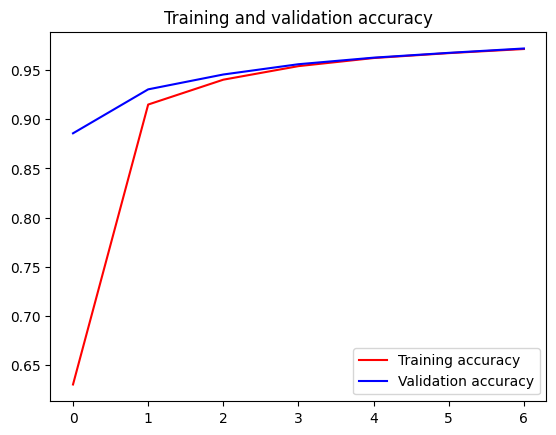

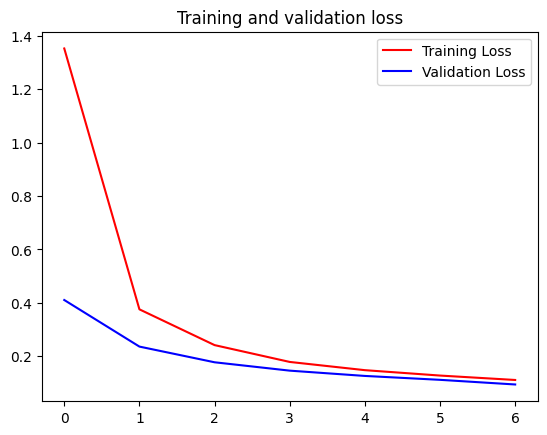

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate The Model

In [43]:
sunflower_url = "https://domf5oio6qrcr.cloudfront.net/medialibrary/5390/h1218g16207258089583.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(IMG_SIZE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 60ms/step
This image most likely belongs to Tomat with a 16.04 percent confidence.


# Save the Model

In [44]:
model.save('Model/Resnetmodel1.h5')
print('Model Saved!')

Model Saved!


In [14]:
from tensorflow.keras.models import load_model
load=load_model('Model/Resnetmodel1.h5')
load.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [15]:
sunflower_url = "https://domf5oio6qrcr.cloudfront.net/medialibrary/5390/h1218g16207258089583.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(IMG_SIZE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = load.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 2s 2s/step
This image most likely belongs to Tomat with a 16.04 percent confidence.
